In [1]:
from exact_diag import form_basis, periodic_ham
from exact_diag import ham_op_2, antiperiodic_ham
from exact_diag import casimir_dict, find_nk, find_skz, quantum_operator
import matplotlib.pyplot as plt
import numpy as np
import tqdm

In [2]:
l = 4
k_peri = np.pi*np.arange(-2*l, 2*l, 2)/(2*l)
k_anti = np.pi*np.arange(-2*l+1, 2*l, 2)/(2*l)


Gc = 2./np.sum(np.abs(k_peri))

G1 = 0.7*Gc
G2 = G1/(2*G1/Gc-1)
print('Gs/Gc')
print(G1/Gc)
print(G2/Gc)

cds = [casimir_dict(l, i, 1) for i in range(l)]

Gs/Gc
0.7
1.7500000000000002


# Below half-filling

In [3]:
Nup = l//2
Ndwn = l//2
basis = form_basis(2*l, Nup, Ndwn)
    
hp_below = periodic_ham(l, G1, basis)
ha1_below = ham_op_2(l, G1, k_anti[l:], basis)
ha2_below = antiperiodic_ham(l, G1, basis)

hp_above = periodic_ham(l, G2, basis)
ha1_above = ham_op_2(l, G2, k_anti[l:], basis)
ha2_above = antiperiodic_ham(l, G2, basis)

cos = [quantum_operator(cd, basis=basis) for cd in cds]

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


[-1.69121984 -1.17809725 -1.17809725 -1.17809725 -0.92381098 -0.92381098
 -0.92381098 -0.92381098 -0.56850892 -0.54873675]
[-3.11997205 -2.73723043 -2.40251769 -2.40251769 -2.40251769 -2.33151452
 -2.24434952 -2.14373414 -2.14373414 -2.14373414]
[-3.11997205 -2.73723043 -2.40251769 -2.40251769 -2.40251769 -2.33151452
 -2.24434952 -2.14373414 -2.14373414 -2.14373414]


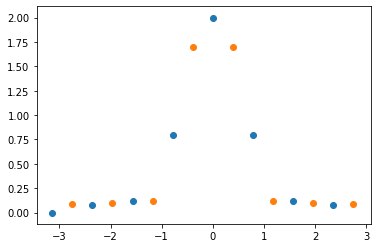

In [4]:
ep, vp = hp_below.eigh()
ea1, va1 = ha1_below.eigh()
ea2, va2 = ha2_below.eigh()
print(ep[:10])
print(ea1[:10])
print(ea2[:10])

eps_degen = ep[np.abs(ep - ep[0]) < 10**-10]
for i in range(len(eps_degen)):
    n_peri = find_nk(l, vp[:,i], basis)
    n_anti = find_nk(l, va2[:,0], basis)
    plt.scatter(k_peri, n_peri)
    plt.scatter(k_anti, n_anti)
    plt.show()


[-11.50351692 -11.50351692 -11.13201318 -11.13201318 -11.11419821
 -11.11419821  -9.93028864  -9.93028864  -9.28924098  -9.23342244]
[-16.48017445 -16.26785404 -13.4316032  -13.05680803 -13.05680803
 -13.05680803 -12.7649849  -12.75852031 -12.75852031 -12.75852031]
[-16.48017445 -16.26785404 -13.4316032  -13.05680803 -13.05680803
 -13.05680803 -12.7649849  -12.75852031 -12.75852031 -12.75852031]


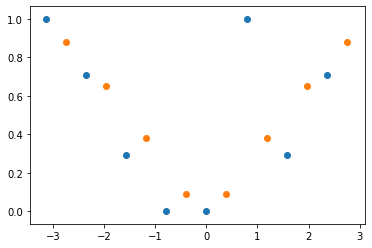

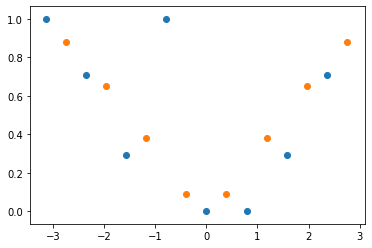

In [5]:
ep, vp = hp_above.eigh()
ea1, va1 = ha1_above.eigh()
ea2, va2 = ha2_above.eigh()
print(ep[:10])
print(ea1[:10])
print(ea2[:10])

eps_degen = ep[np.abs(ep - ep[0]) < 10**-10]
for i in range(len(eps_degen)):
    n_peri = find_nk(l, vp[:,i], basis)
    n_anti = find_nk(l, va2[:,0], basis)
    plt.scatter(k_peri, n_peri)
    plt.scatter(k_anti, n_anti)
    plt.show()

In [ ]:
Gs = np.arange(0, 4.05, .05)*Gc
eps_05 = np.zeros(len(Gs))
eas_05 = np.zeros(len(Gs))
for i, G in enumerate(tqdm.tqdm(Gs)):
    hp = periodic_ham(l, G, basis)
    ha = ham_op_2(l, G, k_anti[l:], basis)
    ep, _ = hp.eigh()
    eps_05[i] = ep[0]
    ea, _ = ha.eigh()
    eas_05[i] = ea[0]

 68%|██████▊   | 55/81 [02:21<00:41,  1.61s/it]

In [ ]:
plt.scatter(Gs/Gc, np.gradient(eps_05, Gs/Gc))
plt.scatter(Gs/Gc, np.gradient(eas_05, Gs/Gc))
plt.axvline(1)

## Above 1/2 filling

In [ ]:
Nup = 3*l//2
Ndwn = 3*l//2
basis = form_basis(2*l, Nup, Ndwn)
    
hp_below = periodic_ham(l, G1, basis)
ha1_below = ham_op_2(l, G1, k_anti[l:], basis)
ha2_below = antiperiodic_ham(l, G1, basis)

hp_above = periodic_ham(l, G2, basis)
ha1_above = ham_op_2(l, G2, k_anti[l:], basis)
ha2_above = antiperiodic_ham(l, G2, basis)

cos = [quantum_operator(cd, basis=basis) for cd in cds]

In [ ]:
ep, vp = hp_below.eigh()
ea1, va1 = ha1_below.eigh()
ea2, va2 = ha2_below.eigh()
print(ep[:10])
print(ea1[:10])
print(ea2[:10])

eps_degen = ep[np.abs(ep - ep[0]) < 10**-10]
for i in range(len(eps_degen)):
    n_peri = find_nk(l, vp[:,i], basis)
    n_anti = find_nk(l, va2[:,0], basis)
    plt.scatter(k_peri, n_peri)
    plt.scatter(k_anti, n_anti)
    plt.show()

In [ ]:
ep, vp = hp_above.eigh()
ea1, va1 = ha1_above.eigh()
ea2, va2 = ha2_above.eigh()
print(ep[:10])
print(ea1[:10])
print(ea2[:10])

eps_degen = ep[np.abs(ep - ep[0]) < 10**-10]
for i in range(len(eps_degen)):
    n_peri = find_nk(l, vp[:,i], basis)
    n_anti = find_nk(l, va2[:,0], basis)
    plt.scatter(k_peri, n_peri)
    plt.scatter(k_anti, n_anti)
    plt.show()

In [ ]:
Gs = np.arange(0, 4.05, .05)*Gc
eps_15 = np.zeros(len(Gs))
eas_15 = np.zeros(len(Gs))
for i, G in enumerate(tqdm.tqdm(Gs)):
    hp = periodic_ham(l, G, basis)
    ha = ham_op_2(l, G, k_anti[l:], basis)
    ep, _ = hp.eigh()
    eps_15[i] = ep[0]
    ea, _ = ha.eigh()
    eas_15[i] = ea[0]

In [ ]:
plt.figure(figsize=(5,5), dpi=200)
plt.plot(Gs, np.gradient(.5*eas_15/l, Gs))
plt.scatter(Gs, np.gradient(.5*eps_15/l, Gs), label=r'$\rho = 1.5$')
plt.plot(Gs, np.gradient(.5*eas_05/l, Gs))
plt.scatter(Gs, np.gradient(.5*eps_05/l, Gs), label=r'$\rho = 0.5$')
plt.xlabel(r'$G$')
plt.ylabel(r'$de/dG$')
plt.axvline(Gc, ls='--', color='black')

plt.legend()
plt.savefig('periodic_antiperiodic_energies.png')